In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('credit_cards.csv')

#show the first ten records in the dataset
first = data.head(10)

#data.columns

print(first)

data

   Card Type Full Name      Issuing Bank       Card Number  \
0                 Visa             Chase  4431465245886276   
1             Discover          Discover  6224764404044446   
2  Japan Credit Bureau               JCB  3541789329050940   
3     American Express  American Express   371306399244328   
4                 Visa             Chase  4332985341176660   
5          Master Card             Chase  5405935391199277   
6          Master Card              USAA  5359097928073131   
7          Master Card   Bank of America  5230327834921460   
8             Discover          Discover  6469129126918968   
9             Discover          Discover  6011199663449639   

      Card Holder's Name  CVV2 Issue Date Expiry Date  Billing Date  Card PIN  \
0          Frank Q Ortiz   362    09/2016     09/2034             7      1247   
1        Tony E Martinez    35    06/2012     06/2030            23      6190   
2            Ana M Downs   945    03/2017     03/2021            10      8

,Card Type Full Name,Issuing Bank,Card Number,Card Holder's Name,CVV2,Issue Date,Expiry Date,Billing Date,Card PIN,Credit Limit
0,Visa,Chase,4431465245886276,Frank Q Ortiz,362,09/2016,09/2034,7,1247,103700
1,Discover,Discover,6224764404044446,Tony E Martinez,35,06/2012,06/2030,23,6190,92900
2,Japan Credit Bureau,JCB,3541789329050940,Ana M Downs,945,03/2017,03/2021,10,8550,71500
3,American Express,American Express,371306399244328,Calvin T House,3868,09/2007,09/2018,26,1777,190500
4,Visa,Chase,4332985341176660,Gilda J Wade,237,12/2012,12/2023,26,5551,179700
...,...,...,...,...,...,...,...,...,...,...
995,Japan Credit Bureau,JCB,3548795949760431,Theresa F King,642,04/2012,04/2021,15,6946,82400
996,Japan Credit Bureau,JCB,3566452282997041,Terence D Mejia,994,08/2016,08/2033,18,2914,138200
997,Japan Credit Bureau,JCB,3539269980463108,Yolanda Moore,150,12/2012,12/2030,14,39,193300
998,Discover,Discover,6011716359815938,Kurtis V Haney,121,09/2010,09/2025,28,2953,157200


In [4]:
#rename columns

data.rename(columns = {'Card Type Full Name':'Type',"Card Holder's Name":'Client'}, inplace = True)

In [5]:
#

In [6]:
data.columns

Index(['Type', 'Issuing Bank', 'Card Number', 'Client', 'CVV2', 'Issue Date',
       'Expiry Date', 'Billing Date', 'Card PIN', 'Credit Limit'],
      dtype='object')

In [7]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          1000 non-null   object
 1   Issuing Bank  1000 non-null   object
 2   Card Number   1000 non-null   int64 
 3   Client        1000 non-null   object
 4   CVV2          1000 non-null   int64 
 5   Issue Date    1000 non-null   object
 6   Expiry Date   1000 non-null   object
 7   Billing Date  1000 non-null   int64 
 8   Card PIN      1000 non-null   int64 
 9   Credit Limit  1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [8]:
#show card type, bank, client for all cases where credit limit > 70 k 
data[data['Credit Limit'] > 70000][['Type','Issuing Bank', 'Client']]
print(data['Type'].unique())

x = len(data['Type'].unique())
print (x)

data['Issuing Bank'].value_counts()



['Visa' 'Discover' 'Japan Credit Bureau' 'American Express' 'Master Card'
 'Diners Club International']
6


JCB                 168
Diners Club         164
Chase               133
Discover            130
American Express    104
Bank of America      69
Capital One          49
Citibank             49
USAA                 38
U.S. Bancorp         30
Wells Fargo          20
GE Capital           14
Barclays             14
PNC                  10
First National        4
Cabela�s WFB          4
Name: Issuing Bank, dtype: int64

In [9]:
#find all clients, billing date, card number for clients of chase bank
data[data['Issuing Bank'] == 'Chase'][['Client','Billing Date', 'Card Number']]

,Client,Billing Date,Card Number
0,Frank Q Ortiz,7,4431465245886276
4,Gilda J Wade,26,4332985341176660
5,Doris Giles,2,5405935391199277
12,Valentin G Doyle,16,5130409236105925
15,Robert B Mcintyre,10,5379481552433991
...,...,...,...
963,Debra P Cochran,17,4402799202123082
970,Alana Tanner,25,5462624880054520
980,Michel U Burke,21,4253648620957219
986,Magdalena Kidd,20,5356523903901791


In [10]:
#show all client card numbers, credit limits for visa and with credit limit > 100k 
data[(data['Type']=='Visa') & (data['Credit Limit'] > 70000)][['Card Number', 'Credit Limit']]

,Card Number,Credit Limit
0,4431465245886276,103700
4,4332985341176660,179700
18,4821146928941954,106900
21,4947220459670651,124000
29,4021927175265827,154200
...,...,...
978,4184597026254933,125900
982,4217617952786517,87400
984,4792292367755599,120300
985,4009846246856396,190800


In [11]:
#get all clients issuing bank, credit limit of all those that are master card and expirey date after 2020
data[(data['Type']=='Master Card') & (data['Expiry Date'].str[-4:] > '2020')][['Issuing Bank', 'Credit Limit', 'Expiry Date']]

after_2020 = data[(data['Type'] == ' Master Card') & (data['Expiry Date'].apply(lambda x: x[3:]) >= '2021')]
after_2020[['Client', 'Issuing Bank', 'Credit Limit']]

data['Expiry Date'].apply(lambda x: x[3:])

0      2034
1      2030
2      2021
3      2018
4      2023
       ... 
995    2021
996    2033
997    2030
998    2025
999    2019
Name: Expiry Date, Length: 1000, dtype: object

<AxesSubplot:title={'center':'Prevalant Cards'}, xlabel='Credit Card Types', ylabel='Clients'>

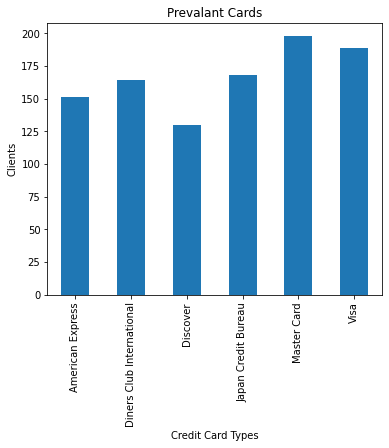

In [13]:
df = data.groupby(['Type']).count()['Client']
#data['Type'].value_counts()
df.plot(kind='bar', title='Prevalant Cards', ylabel='Clients',
         xlabel='Credit Card Types',figsize=(6, 5))